# 开始实现一个Grover算法

In [1]:
%matplotlib inline
from IPython.display import Image
from numpy import pi
import numpy as np
from qutip import *
from qutip.qip.operations import *
from qutip.qip.circuit import QubitCircuit, Gate
import math
from math import sin, cos

In [2]:
import sys
sys.path.append('..')
sys.path.append('../library')
from library.my_quantum_tool import *
from library.my_gate import ccphase, pauli_x

In [3]:
qubit_num = 3
reverse_states = False  # 和qc engine保持一致,没法保持一致

In [4]:

def HadGate():
    qc = QubitCircuit(qubit_num, reverse_states=reverse_states)
    for qubit in range(qubit_num):
        qc.add_gate('SNOT', targets=[qubit])
#     qc.png
    return qc

## 制备一个黑盒子

In [5]:
# number_to_flip = 3
def BlackBoxGate():
    qc = QubitCircuit(qubit_num, reverse_states=reverse_states)
    qc.user_gates = {"CCPHASE": ccphase, "NOT": pauli_x}
    for qubit in range(0,1):
        qc.add_gate("NOT", qubit)
    qc.add_gate("CCPHASE", targets=range(qubit_num), arg_value={'qubit_num': qubit_num, 'rotation': 180})
    for qubit in range(0,1):
        qc.add_gate("NOT", qubit)
    return qc

def GroverGate():
    qc = QubitCircuit(qubit_num, reverse_states=reverse_states)
    qc.user_gates = {"CCPHASE": ccphase, "NOT": pauli_x}
    for qubit in range(qubit_num):
        qc.add_gate('SNOT', targets=[qubit])
        qc.add_gate('NOT', targets=[qubit])
 
    qc.add_gate("CCPHASE", targets=range(qubit_num), arg_value={'qubit_num': qubit_num, 'rotation': 180})
    
    for qubit in range(qubit_num):
        qc.add_gate('NOT', targets=[qubit])
        qc.add_gate('SNOT', targets=[qubit])
    return qc

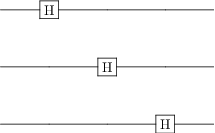

In [6]:
had_gate = HadGate()
had_gate.png

C:\Users\Tan Siwei\AppData\Local\conda\conda\envs\py3\lib\site-packages\qutip\qip\circuit.py:275: UserWarning: Unknown gate NOT
  warnings.warn("Unknown gate %s" % name)
C:\Users\Tan Siwei\AppData\Local\conda\conda\envs\py3\lib\site-packages\qutip\qip\circuit.py:275: UserWarning: Unknown gate CCPHASE
  warnings.warn("Unknown gate %s" % name)


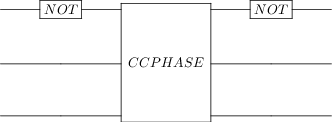

In [7]:
blackbox_gate = BlackBoxGate()
blackbox_gate.png

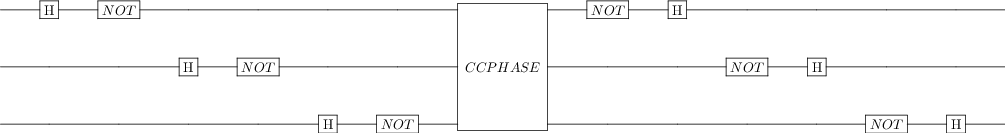

In [8]:
grover_gate = GroverGate()
grover_gate.png

In [9]:
state1 = dot(*had_gate.propagators(),MultiQubitBaseState(qubit_num))
parseStateVecPd(state1)

,000,001,010,011,100,101,110,111
state,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35


In [10]:
blackbox_matrix = dot(*blackbox_gate.propagators())
# paresGateMatrix(blackbox_matrix)
paresGateMatrixPd(blackbox_matrix)

,000,001,010,011,100,101,110,111
000,1.0,,,,,,,
001,,1.0,,,,,,
010,,,1.0,,,,,
011,,,,1.0|-180,,,,
100,,,,,1.0,,,
101,,,,,,1.0,,
110,,,,,,,1.0,
111,,,,,,,,1.0


In [21]:
blackbox_matrix

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]

In [11]:
state2 = dot(blackbox_matrix,state1)
parseStateVecPd(state2)

,000,001,010,011,100,101,110,111
state,0.35,0.35,0.35,0.35|-180,0.35,0.35,0.35,0.35


In [23]:
state2

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [-0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]

In [12]:
grover_matrix = dot(*grover_gate.propagators())
paresGateMatrixPd(grover_matrix, 180)

,000,001,010,011,100,101,110,111
000,0.75|180,0.25,0.25,0.25,0.25,0.25,0.25,0.25
001,0.25,0.75|180,0.25,0.25,0.25,0.25,0.25,0.25
010,0.25,0.25,0.75|180,0.25,0.25,0.25,0.25,0.25
011,0.25,0.25,0.25,0.75|180,0.25,0.25,0.25,0.25
100,0.25,0.25,0.25,0.25,0.75|180,0.25,0.25,0.25
101,0.25,0.25,0.25,0.25,0.25,0.75|180,0.25,0.25
110,0.25,0.25,0.25,0.25,0.25,0.25,0.75|180,0.25
111,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.75|180


In [22]:
grover_matrix

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.75 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25  0.75 -0.25 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25  0.75 -0.25 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25  0.75]]

In [13]:
state3 = dot(grover_matrix,state2)
parseStateVecPd(state3, 180)

,000,001,010,011,100,101,110,111
state,0.18,0.18,0.18,0.88,0.18,0.18,0.18,0.18


# 演化: 门电路 + 输入

#  注意下幅角180实部为-, 幂指数不适合表示加法是困难的

# 问题1: 如何计算一个适合表示的global phase

# 问题2: 稀疏矩阵表示

In [15]:
# 测试一下ccphase
# ccphase_m = ccphase({'qubit_num': qubit_num, 'rotation': 30})
# ccphase_m  #isherm是个很难搞，先不管了
# paresGateMatrix(ccphase_m) #cphase 只有全为1的时候才会转

In [16]:
# qc.resolve_gates("CNOT").png  #NotImplementedError: Gate CCPHASE cannot be resolved.

In [17]:
paresGateMatrix(tensor(rz(pi/3), rz(pi/3), rz(pi/3)))

000	001	010	011	100	101	110	111	
1.0|-90	0	0	0	0	0	0	0	000
0	1.0|-30	0	0	0	0	0	0	001
0	0	1.0|-30	0	0	0	0	0	010
0	0	0	1.0|30	0	0	0	0	011
0	0	0	0	1.0|-30	0	0	0	100
0	0	0	0	0	1.0|30	0	0	101
0	0	0	0	0	0	1.0|30	0	110
0	0	0	0	0	0	0	1.0|90	111


# 其他

In [18]:
tensor(rz(pi/3), rz(pi/3), rz(pi/3))
# 不重叠的门可以互相做

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.       -1.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.8660254-0.5j 0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.8660254-0.5j 0.       +0.j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.8660254+0.5j
  0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.8660254-0.5j 0.       +0.j  0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.8660254+0.5j 0.       +0.j  0.       +0.j ]
 [0.       +0.j  0.       +0.j  0.       +0.j  0.       +0.j
  0.       +0.j  0.       +0.j  0.8660254+0.5j 0.       +0.j ]
 [0.       +0.j  0.       +0

In [19]:
qc1 = QubitCircuit(3, reverse_states=False)
for i in range(3):
    qc1.add_gate('RZ', targets=[i], arg_value=pi/3)
qc1.png
paresGateMatrix(dot(*qc1.propagators()))

000	001	010	011	100	101	110	111	
1.0|-90	0	0	0	0	0	0	0	000
0	1.0|-30	0	0	0	0	0	0	001
0	0	1.0|-30	0	0	0	0	0	010
0	0	0	1.0|30	0	0	0	0	011
0	0	0	0	1.0|-30	0	0	0	100
0	0	0	0	0	1.0|30	0	0	101
0	0	0	0	0	0	1.0|30	0	110
0	0	0	0	0	0	0	1.0|90	111


In [20]:
dot(sqrtnot(),sqrtnot())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [24]:
a = 1 + 1j
b = 1 + 2j